# Data wrangling for SolarPowerCompany Capstone

In [2]:
#Importing necessary packages
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [3]:
#Loading all data from website: https://opendata.edp.com/explore/?refine.keyword=visible&sort=modified
#Note: export files from: https://opendata.edp.com/explore/dataset/htw-failures-2016/export/
#Full list of dfs in table_names, weathers is weather station data and pvs is the solar celld data. 
table_names = ['faro_meteo_2014','faro_meteo_2015','faro_meteo_2016','sunlab-faro-pv-2014','sunlab-faro-pv-2015','sunlab-faro-pv-2016']
weathers = [w for w in table_names if 'meteo' in w]
pvs = [p for p in table_names if 'faro-pv' in p]

In [4]:
#Setting URLs for dataframe extraction
url1 = 'https://opendata.edp.com/explore/dataset/'
url2 = '/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B'

In [5]:
# Set n to min(year)-1. Will load all PV data. 
n = 2013

for i in pvs:
    url = url1+i+url2
    n += 1
    df = pd.read_csv(url, sep=';')
    name = 'pv_'+str(n)
    globals()[name] = df

In [7]:
# Function sorting by datetime, reset index to datetime, and extracting only optimal angle PV data by dropping vertical and horizontal columns. 
#def optimal_data(pv_df):
#    cols = pv_df.columns.str.contains('|'.join(['Optimal','Datetime']))
#    pv_df = pf_df.loc[:,cols]

In [8]:
pv_tot = [pv_2014,pv_2015,pv_2016]
#for i in pv_tot:
#    cols = i.columns.str.contains('|'.join(['Optimal','Datetime']))
#    i = i.loc[:,cols]
#    i.sort_values('Datetime')

In [59]:
cols = pv_2014.columns.str.contains('|'.join(['Optimal','Datetime']))
pv_2014 = pv_2014.loc[:,cols]
pv_2014.dtypes


Datetime                         object
A_Optimal - Voltage DC [V]      float64
A_Optimal - Current DC [A]      float64
A_Optimal - Power DC [W]        float64
A_Optimal - Temperature [ºC]    float64
B_Optimal - Voltage DC [V]      float64
B_Optimal - Current DC [A]      float64
B_Optimal - Power DC [W]        float64
B_Optimal - Temperature [ºC]    float64
dtype: object

In [60]:
#Sort datetime as datetime object
pv_2014['Datetime'] = pd.to_datetime(pv_2014['Datetime'])

<ipython-input-60-8cdbf66bfea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2014['Datetime'] = pd.to_datetime(pv_2014['Datetime'])


In [61]:
pv_2014.sort_values('Datetime',inplace=True)
pv_2014.set_index('Datetime',inplace=True)
pv_2014.head()

<ipython-input-61-ea8864858563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2014.sort_values('Datetime',inplace=True)


,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
Datetime,,,,,,,,
2014-01-01 07:41:00+00:00,14.6,0.19527,2.850946,9.4,NaN,NaN,NaN,9.7
2014-01-01 07:42:00+00:00,23.1,0.07250,1.674750,9.4,18.30,0.130512,2.388366,9.7
2014-01-01 07:43:00+00:00,23.1,0.07500,1.732500,9.4,22.35,0.052500,1.173375,9.7
2014-01-01 07:44:00+00:00,23.1,0.07750,1.790250,9.5,24.35,0.052500,1.278375,9.7
2014-01-01 07:45:00+00:00,22.2,0.08250,1.831500,9.5,25.25,0.052500,1.325625,9.7


In [62]:
pv_2014.isnull().sum()

A_Optimal - Voltage DC [V]      1819
A_Optimal - Current DC [A]      1819
A_Optimal - Power DC [W]        1819
A_Optimal - Temperature [ºC]       0
B_Optimal - Voltage DC [V]      2503
B_Optimal - Current DC [A]      2503
B_Optimal - Power DC [W]        2503
B_Optimal - Temperature [ºC]       0
dtype: int64

In [63]:
pv_2014.describe()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
count,260326.000000,260326.000000,260326.000000,262145.000000,259642.000000,259642.000000,259642.000000,262145.000000
mean,27.548402,3.577849,100.105835,27.776741,26.475817,3.550063,97.261609,29.508469
std,2.152847,2.633185,72.999151,8.683313,3.415378,2.644173,72.595414,9.505423
min,10.100000,0.000000,0.000000,3.900000,10.200000,0.000000,0.000000,4.100000
25%,26.950000,1.020000,28.665563,20.700000,26.800000,0.995000,24.728500,21.700000
50%,27.850000,3.295000,94.726625,27.900000,27.400000,3.222500,91.200000,29.500000
75%,28.850000,6.107500,170.354438,34.600000,28.100000,6.102500,167.580000,37.100000
max,36.900000,10.237500,307.636875,54.400000,36.550000,10.237500,303.030000,56.900000


In [65]:
#Same process for 2015 and 2016
cols = pv_2015.columns.str.contains('|'.join(['Optimal','Datetime']))
pv_2015 = pv_2015.loc[:,cols]
cols = pv_2016.columns.str.contains('|'.join(['Optimal','Datetime']))
pv_2016 = pv_2016.loc[:,cols]

In [66]:
pv_2015['Datetime'] = pd.to_datetime(pv_2015['Datetime'])
pv_2015.sort_values('Datetime',inplace=True)
pv_2015.set_index('Datetime',inplace=True)
pv_2016['Datetime'] = pd.to_datetime(pv_2016['Datetime'])
pv_2016.sort_values('Datetime',inplace=True)
pv_2016.set_index('Datetime',inplace=True)

<ipython-input-66-104782e95679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2015['Datetime'] = pd.to_datetime(pv_2015['Datetime'])
<ipython-input-66-104782e95679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2015.sort_values('Datetime',inplace=True)
<ipython-input-66-104782e95679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [67]:
pv_2015.head()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
Datetime,,,,,,,,
2015-01-01 07:40:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:41:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:42:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:43:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:44:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.1


In [68]:
pv_2016.head()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
Datetime,,,,,,,,
2016-01-01 07:43:00+00:00,NaN,NaN,NaN,17.6,NaN,NaN,NaN,18.0
2016-01-01 07:44:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.2
2016-01-01 07:45:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.3
2016-01-01 07:46:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.4
2016-01-01 07:47:00+00:00,NaN,NaN,NaN,17.9,NaN,NaN,NaN,18.4


In [69]:
pv_2015.isnull().sum()

A_Optimal - Voltage DC [V]      4854
A_Optimal - Current DC [A]      4854
A_Optimal - Power DC [W]        4854
A_Optimal - Temperature [ºC]       0
B_Optimal - Voltage DC [V]      3765
B_Optimal - Current DC [A]      3765
B_Optimal - Power DC [W]        3765
B_Optimal - Temperature [ºC]       0
dtype: int64

In [70]:
pv_2016.isnull().sum()

A_Optimal - Voltage DC [V]      3488
A_Optimal - Current DC [A]      3488
A_Optimal - Power DC [W]        3488
A_Optimal - Temperature [ºC]       0
B_Optimal - Voltage DC [V]      2965
B_Optimal - Current DC [A]      2965
B_Optimal - Power DC [W]        2965
B_Optimal - Temperature [ºC]       0
dtype: int64

In [71]:
pv_2015.describe()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
count,237881.000000,237881.000000,237881.000000,242735.000000,238970.000000,238970.000000,238970.000000,242735.000000
mean,27.434931,3.719734,103.750133,28.708070,26.324167,3.707638,101.255219,30.540670
std,2.177097,2.636596,73.016633,8.844692,3.607820,2.665199,73.035523,9.681179
min,10.100000,0.000000,0.000000,2.000000,10.350000,0.000000,0.000000,2.300000
25%,26.950000,1.145000,32.232000,21.700000,26.750000,1.115000,28.196437,22.800000
50%,27.750000,3.547500,101.427500,29.200000,27.350000,3.490000,98.325000,31.000000
75%,28.700000,6.312500,174.998250,35.700000,28.000000,6.345000,173.052000,38.400000
max,34.650000,10.237500,307.636875,54.000000,34.900000,10.237500,302.006250,55.500000


In [72]:
pv_2016.describe()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
count,174284.000000,174284.000000,174284.000000,177772.000000,174807.000000,174807.000000,174807.000000,177772.000000
mean,27.670370,3.375201,96.012102,28.924899,26.287085,3.581693,97.548834,30.857634
std,2.909338,2.379406,67.654038,9.198494,3.553645,2.602800,71.077376,10.112498
min,10.100000,0.000000,0.000000,3.900000,10.350000,0.000000,0.000000,3.900000
25%,27.300000,1.030000,28.860000,21.300000,26.650000,1.035000,25.778062,22.300000
50%,28.150000,3.397500,97.565125,28.800000,27.300000,3.370000,94.830750,30.700000
75%,29.350000,5.197500,148.224250,36.600000,27.950000,6.125000,166.676250,39.300000
max,35.300000,10.237500,287.194000,58.600000,35.150000,10.237500,298.423125,62.000000


For ease, we're also going to replace the Optimal in all column labels. We're also going to elimnate rows which are missing both A & B Voltage, Current, and Power data. 

In [73]:
# Cleaning up column names
pv_2014.columns = pv_2014.columns.str.replace('_Optimal - ',' ')
pv_2015.columns = pv_2015.columns.str.replace('_Optimal - ',' ')
pv_2016.columns = pv_2016.columns.str.replace('_Optimal - ',' ')

In [76]:
pv_2016.head()

,A Voltage DC [V],A Current DC [A],A Power DC [W],A Temperature [ºC],B Voltage DC [V],B Current DC [A],B Power DC [W],B Temperature [ºC]
Datetime,,,,,,,,
2016-01-01 07:43:00+00:00,NaN,NaN,NaN,17.6,NaN,NaN,NaN,18.0
2016-01-01 07:44:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.2
2016-01-01 07:45:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.3
2016-01-01 07:46:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.4
2016-01-01 07:47:00+00:00,NaN,NaN,NaN,17.9,NaN,NaN,NaN,18.4


In [83]:
# Getting rid of null rows. 
pv_2014.dropna(thresh=5,inplace=True)
pv_2015.dropna(thresh=5,inplace=True)
pv_2016.dropna(thresh=5,inplace=True)

<ipython-input-83-8795d7cbe479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2014.dropna(thresh=5,inplace=True)
<ipython-input-83-8795d7cbe479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2015.dropna(thresh=5,inplace=True)
<ipython-input-83-8795d7cbe479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2016.dropna(thresh=5,inplace=True)


Now save the dfs as is before any more concats or visualizations.

In [86]:
pv_2014.to_pickle('./pv_2014.pkl')
pv_2015.to_pickle('./pv_2015.pkl')
pv_2016.to_pickle('./pv_2016.pkl')

In [88]:
# Now concat all 3 dfs into one pv df simply called pv_tot.
pv_tot = pd.concat([pv_2014, pv_2015, pv_2016], sort=False)

Now we take a look at the data and see if anything look awry. 

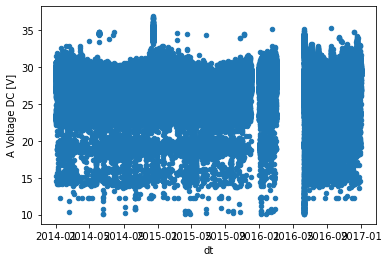

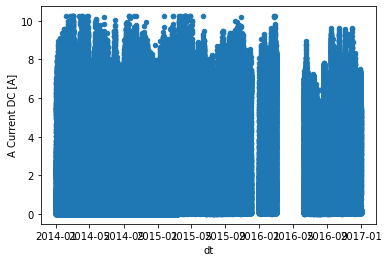

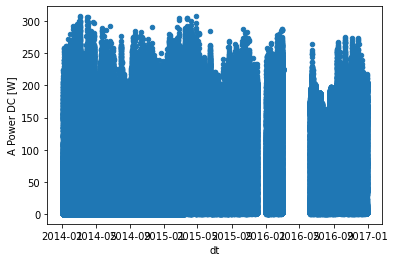

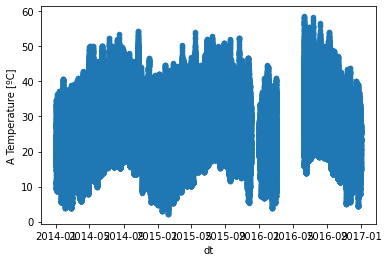

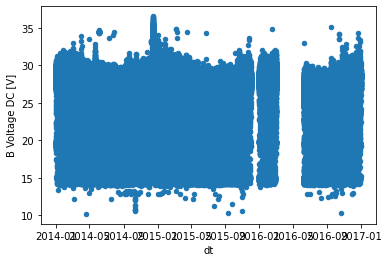

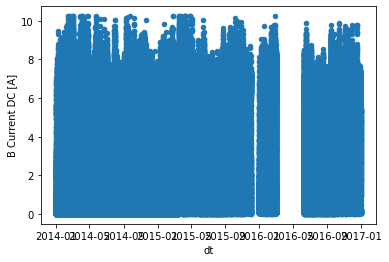

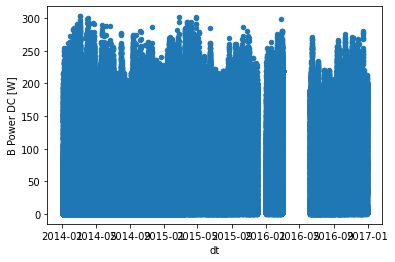

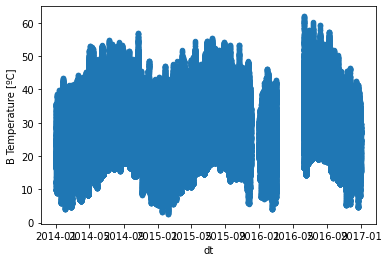

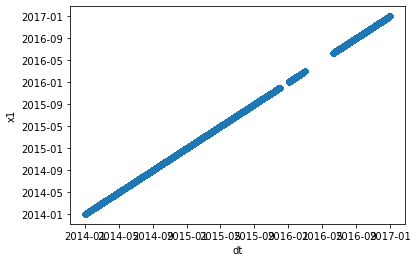

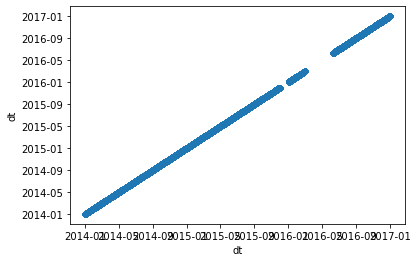

In [95]:
pv_tot['dt']=pv_tot.index
for i in pv_tot.columns:
    pv_tot.plot.scatter(x = 'dt', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1259d5cd0>,
      dtype=object)

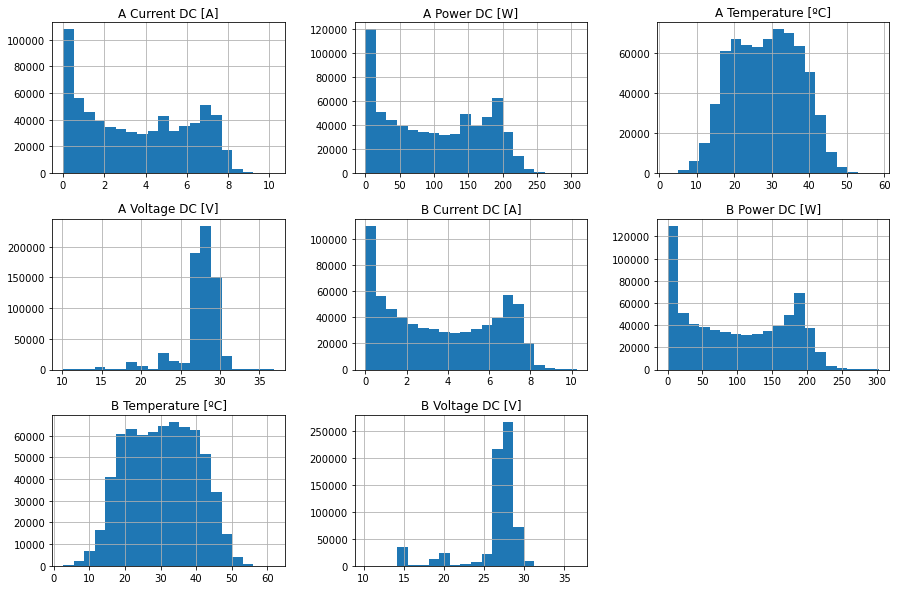

In [96]:
pv_tot.hist(bins=20,figsize=(15,10))

In [123]:
# No drastic A/B differences noted, so we're going to use that as an attribute. 
ts = pv_tot

In [124]:
a_cols = [col for col in ts.columns if 'A ' in col]
b_cols = [col for col in ts.columns if 'B ' in col]
ts_a = ts[a_cols]
ts_b = ts[b_cols]

In [125]:
ts_a['PV Cell'] = 'A'
ts_b['PV Cell'] = 'B'

<ipython-input-125-754e6a424b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_a['PV Cell'] = 'A'
<ipython-input-125-754e6a424b20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_b['PV Cell'] = 'B'


In [126]:
ts_a.columns = ts_a.columns.str.replace('A ','')
ts_b.columns = ts_b.columns.str.replace('B ','')

In [127]:
ts_b.head()

,Voltage DC [V],Current DC [A],Power DC [W],Temperature [ºC],PV Cell
Datetime,,,,,
2014-01-01 07:41:00+00:00,NaN,NaN,NaN,9.7,B
2014-01-01 07:42:00+00:00,18.30,0.130512,2.388366,9.7,B
2014-01-01 07:43:00+00:00,22.35,0.052500,1.173375,9.7,B
2014-01-01 07:44:00+00:00,24.35,0.052500,1.278375,9.7,B
2014-01-01 07:45:00+00:00,25.25,0.052500,1.325625,9.7,B


In [146]:
ts = pd.concat([ts_a,ts_b],sort=True)

In [147]:
ts.isnull().sum()

Current DC [A]      5902
PV Cell                0
Power DC [W]        5902
Temperature [ºC]       0
Voltage DC [V]      5902
dtype: int64

In [148]:
ts.dropna(thresh=3,inplace=True)

In [149]:
ts.isnull().sum()

Current DC [A]      0
PV Cell             0
Power DC [W]        0
Temperature [ºC]    0
Voltage DC [V]      0
dtype: int64

In [151]:
ts.sort_index(inplace=True)

In [152]:
pv_final = ts

Saving final PV df 

In [154]:
pv_final.to_pickle('./pv_final.pkl')

----------------------------

Now moving on to weather data.

In [ ]:
#Load data sets. 
# Set n to min(year)-1. Will load all PV data. 
#Note: not sure why I have to manually put in url????
url1 = 'https://opendata.edp.com/explore/dataset/'
url2 = '/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B'

w_2015 = df=pd.read_csv('https://opendata.edp.com/explore/dataset/'+'faro_meteo_2015'+'/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B',sep=';')

    
    
#df_faro_meteo_2015 = pd.read_csv(faro_meteo_2015, sep=';')

In [ ]:
url15 = 'https://opendata.edp.com/explore/dataset/faro_meteo_2015/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B'

In [ ]:
w_2014.describe(), w_2015.describe(), w_2015.describe()

Precipitation and ATM data are missing.

Reassign names (pv is solar cells and w means weather).

In [14]:
#Dropping Precip & ATM Data for weather
df_w_2015.drop(['Precipitation [mm]','Atmospheric pressure [hPa]'], axis=1,inplace=True)
df_w_2015.head()

In [19]:
df_pv_2015.isnull().count(),df_w_2015.isnull().count()

(Datetime              242735
 A_Voltage DC [V]      242735
 A_Current DC [A]      242735
 A_Power DC [W]        242735
 A_Temperature [ºC]    242735
 B_Voltage DC [V]      242735
 B_Current DC [A]      242735
 B_Power DC [W]        242735
 B_Temperature [ºC]    242735
 dtype: int64,
 Datetime                    437159
 Ambient Temperature [ºC]    437159
 Global Radiation [W/m2]     437159
 Diffuse Radiation [W/m2]    437159
 Ultraviolet [W/m2]          437159
 Wind Velocity [m/s]         437159
 Wind Direction [º]          437159
 dtype: int64)

In [20]:
df_pv_2015.dtypes, df_w_2015.dtypes

(Datetime               object
 A_Voltage DC [V]      float64
 A_Current DC [A]      float64
 A_Power DC [W]        float64
 A_Temperature [ºC]    float64
 B_Voltage DC [V]      float64
 B_Current DC [A]      float64
 B_Power DC [W]        float64
 B_Temperature [ºC]    float64
 dtype: object,
 Datetime                     object
 Ambient Temperature [ºC]    float64
 Global Radiation [W/m2]     float64
 Diffuse Radiation [W/m2]    float64
 Ultraviolet [W/m2]          float64
 Wind Velocity [m/s]         float64
 Wind Direction [º]          float64
 dtype: object)

In [21]:
#Converting Datetime columns to datetime objects
df_pv_2015['Datetime'] = pd.to_datetime(df_pv_2015['Datetime'])
df_w_2015['Datetime'] = pd.to_datetime(df_w_2015['Datetime'])

In [22]:
df_pv_2015.dtypes, df_w_2015.dtypes

(Datetime              datetime64[ns, UTC]
 A_Voltage DC [V]                  float64
 A_Current DC [A]                  float64
 A_Power DC [W]                    float64
 A_Temperature [ºC]                float64
 B_Voltage DC [V]                  float64
 B_Current DC [A]                  float64
 B_Power DC [W]                    float64
 B_Temperature [ºC]                float64
 dtype: object,
 Datetime                    datetime64[ns, UTC]
 Ambient Temperature [ºC]                float64
 Global Radiation [W/m2]                 float64
 Diffuse Radiation [W/m2]                float64
 Ultraviolet [W/m2]                      float64
 Wind Velocity [m/s]                     float64
 Wind Direction [º]                      float64
 dtype: object)

In [23]:
df_pv_2015.Datetime.min(), df_pv_2015.Datetime.max()

(Timestamp('2015-01-01 07:40:00+0000', tz='UTC'),
 Timestamp('2015-11-30 17:22:00+0000', tz='UTC'))

In [24]:
df_w_2015.Datetime.min(), df_w_2015.Datetime.max()

(Timestamp('2015-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2015-10-31 23:00:00+0000', tz='UTC'))

Note that date ranges do not match up perfectly. Now plot columns to check for anamolies. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124365730>,
      dtype=object)

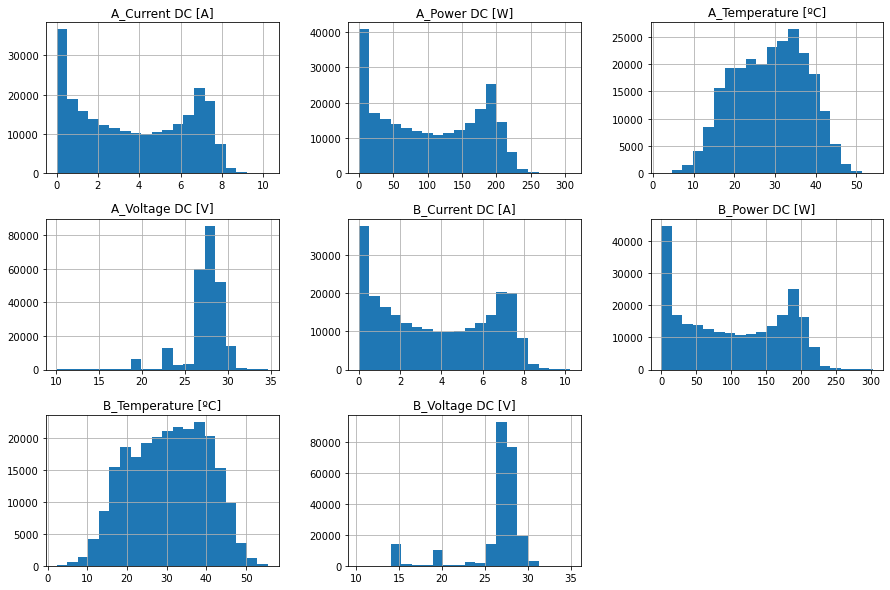

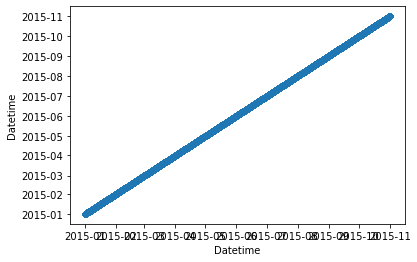

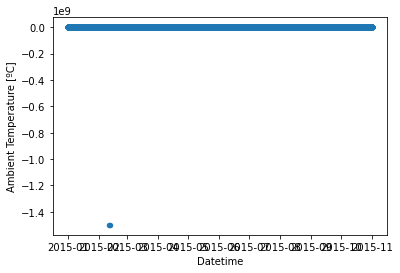

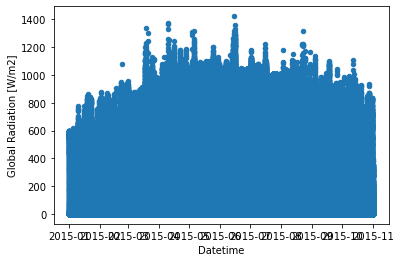

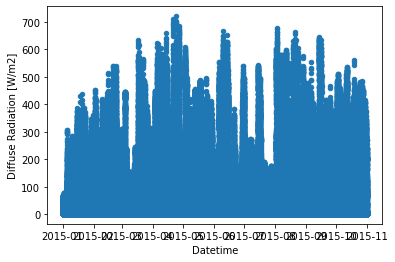

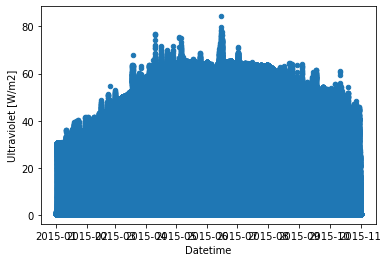

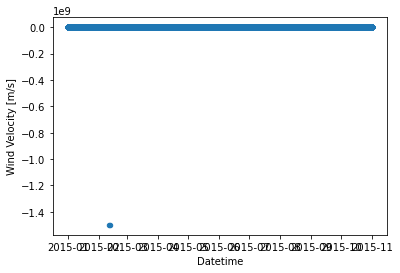

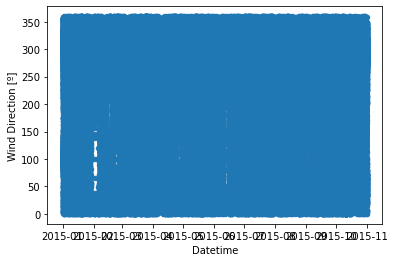

In [28]:
for i in df_w_2015.columns:
    df_w_2015.plot.scatter(x='Datetime', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13176df70>,
      dtype=object)

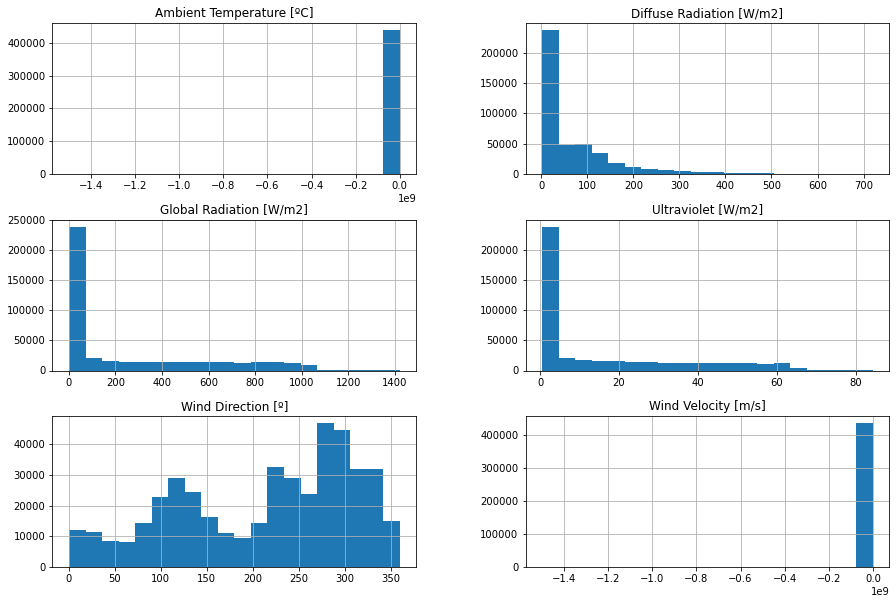

In [29]:
df_w_2015.hist(bins=20,figsize=(15,10))

In [30]:
df_w_2015.head()

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,2015-10-29 01:43:00+00:00,14.600000,1.415117,1.644703,0.510503,0.966667,52.816660
1,2015-10-29 01:56:00+00:00,14.100000,1.693405,1.639023,0.504588,0.233333,14.492228
2,2015-10-29 02:00:00+00:00,14.000000,1.728471,1.653051,0.513537,0.383333,62.996652
3,2015-10-29 02:09:00+00:00,13.883334,1.479107,1.651739,0.513191,0.350000,246.320100
4,2015-10-29 02:13:00+00:00,13.966668,1.419120,1.643130,0.510884,0.633333,279.500640


In [31]:
df_w_2015['Ambient Temperature [ºC]'].describe(),df_w_2015['Wind Velocity [m/s]'].describe()

(count    4.371590e+05
 mean    -6.843366e+03
 std      3.208382e+06
 min     -1.500000e+09
 25%      1.500000e+01
 50%      1.930000e+01
 75%      2.330000e+01
 max      3.716667e+01
 Name: Ambient Temperature [ºC], dtype: float64,
 count    4.371590e+05
 mean    -6.860411e+03
 std      3.208382e+06
 min     -1.500000e+09
 25%      1.016667e+00
 50%      1.866667e+00
 75%      2.900000e+00
 max      9.700002e+00
 Name: Wind Velocity [m/s], dtype: float64)

Locate rows where Ambient Tempt and Wind Velocity have outlier -1.500000e+09 and then remove them. 

In [32]:
df_w_2015.loc[df_w_2015['Ambient Temperature [ºC]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
52588,2015-02-10 20:11:00+00:00,-1.500000e+09,3.830472,3.471248,0.512003,-1.500000e+09,276.36396
111150,2015-02-12 08:05:00+00:00,-1.500000e+09,25.927230,25.650498,4.161949,-1.500000e+09,273.36688


In [33]:
df_w_2015.loc[df_w_2015['Wind Velocity [m/s]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
52588,2015-02-10 20:11:00+00:00,-1.500000e+09,3.830472,3.471248,0.512003,-1.500000e+09,276.36396
111150,2015-02-12 08:05:00+00:00,-1.500000e+09,25.927230,25.650498,4.161949,-1.500000e+09,273.36688


In [34]:
df_w_2015 = df_w_2015.loc[df_w_2015['Wind Velocity [m/s]'] != -1.500000e+09]

In [35]:
df_w_2015.loc[df_w_2015['Wind Velocity [m/s]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]


In [36]:
df_w_2015.loc[df_w_2015['Ambient Temperature [ºC]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]


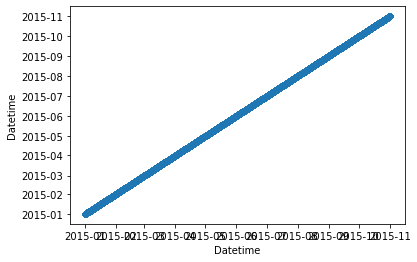

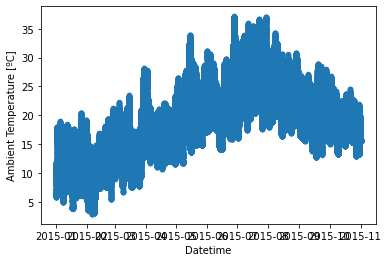

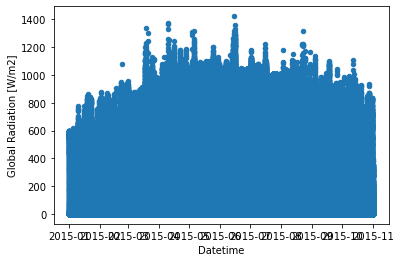

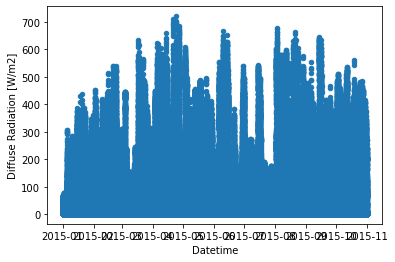

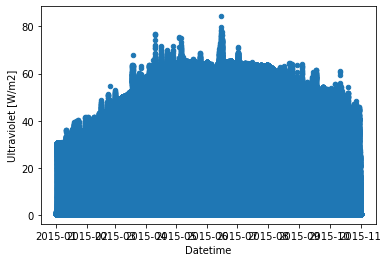

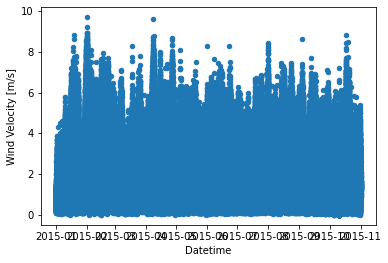

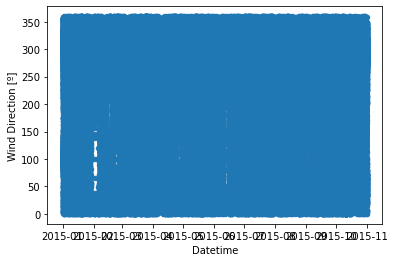

In [37]:
for i in df_w_2015.columns:
    df_w_2015.plot.scatter(x='Datetime', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fbafeb0>,
      dtype=object)

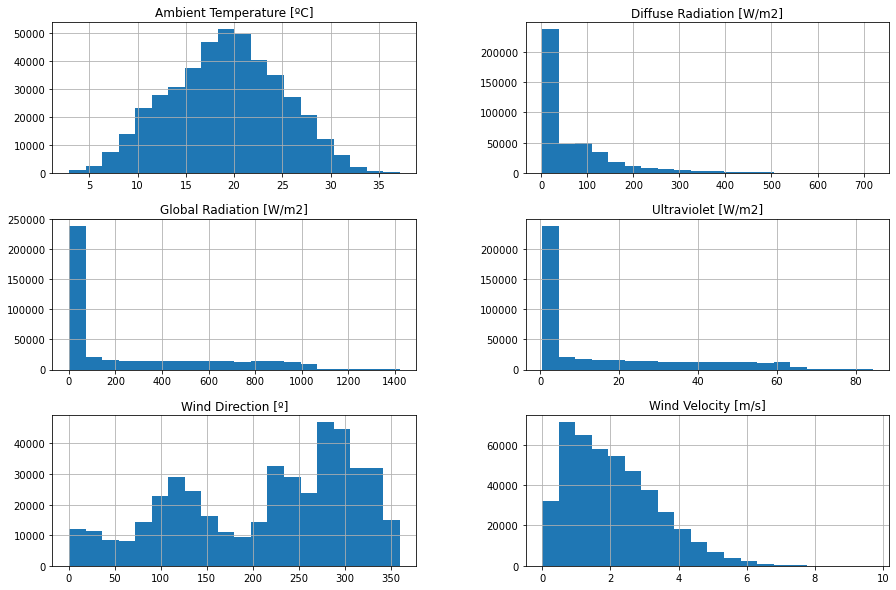

In [38]:
df_w_2015.hist(bins=20,figsize=(15,10))

Now we're going to look at 1 week of values to figure out the best way to group the data. 

In [39]:
mask_week = (df_w_2015['Datetime'] >='2015-03-15') & (df_w_2015['Datetime'] <='2015-03-21')

In [40]:
df_w_week = df_w_2015.loc[mask_week]

In [41]:
df_w_week.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000
mean,12.711363,176.103729,71.701682,11.150339,1.816460,184.772923
std,2.173476,277.664740,109.216721,16.143430,1.113208,102.634725
min,7.500000,0.925354,1.602942,0.499304,0.066667,0.256097
25%,11.200000,1.577627,1.656422,0.510477,0.866667,91.846592
50%,12.500000,4.713674,4.400324,0.756590,1.650000,178.322360
75%,14.166668,243.729820,98.271112,17.703890,2.533334,281.333340
max,17.966668,1338.782800,632.937240,67.706288,8.283333,359.999800


In [42]:
df_w_week.nunique()

Datetime                    8641
Ambient Temperature [ºC]     716
Global Radiation [W/m2]     8630
Diffuse Radiation [W/m2]    8502
Ultraviolet [W/m2]          6957
Wind Velocity [m/s]          407
Wind Direction [º]          8627
dtype: int64

In [43]:
df_w_week.isnull().sum()

Datetime                    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

In [44]:
df_w_week = df_w_week.sort_values('Datetime').reset_index()

In [45]:
df_w_week.head()

,index,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,165756,2015-03-15 00:00:00+00:00,12.500000,1.566362,1.649270,0.509249,1.466667,323.64562
1,251778,2015-03-15 00:01:00+00:00,12.500000,1.278880,1.632248,0.508144,1.633333,332.50000
2,59893,2015-03-15 00:02:00+00:00,12.500000,1.562952,1.624753,0.507149,1.800000,324.01902
3,197430,2015-03-15 00:03:00+00:00,12.500000,1.549573,1.618642,0.506846,1.716667,328.00016
4,383168,2015-03-15 00:04:00+00:00,12.400002,1.886481,1.824666,0.509950,1.600000,326.49572


Plot to see progression

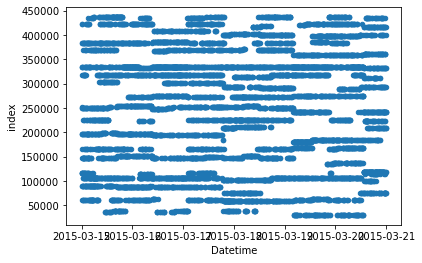

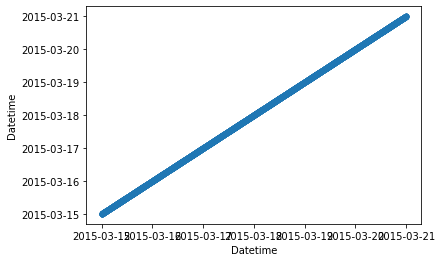

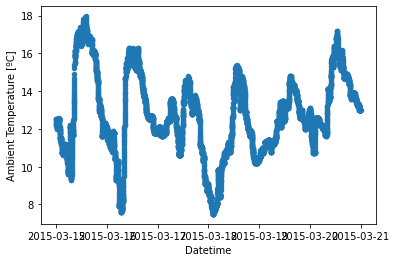

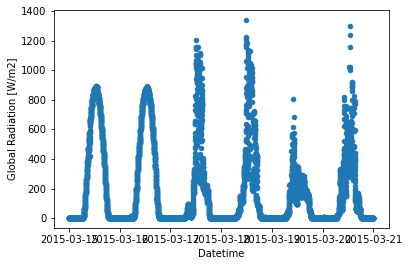

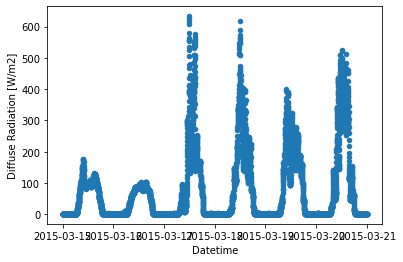

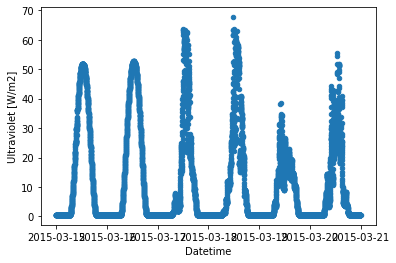

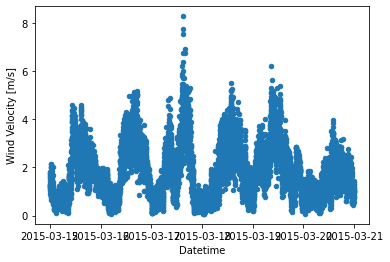

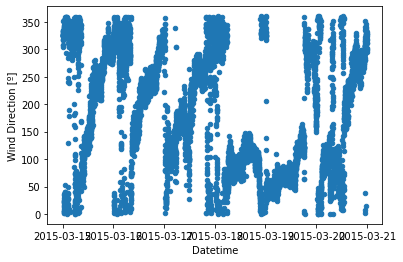

In [46]:
for i in df_w_week.columns:
    df_w_week.plot.scatter(x='Datetime', y = i)

Let's do one day just to see.

In [47]:
mask_day = (df_w_2015['Datetime'] >='2015-03-16') & (df_w_2015['Datetime'] <'2015-03-17')

In [48]:
df_d_day = df_w_2015.loc[mask_day]

In [50]:
df_d_day = df_d_day.sort_values('Datetime').reset_index()

In [51]:
df_d_day.head()

,index,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,334269,2015-03-16 00:00:00+00:00,12.0,1.452431,1.660005,0.505351,1.233334,318.76380
1,150875,2015-03-16 00:01:00+00:00,12.0,1.353939,1.651793,0.504654,1.566667,322.85864
2,88522,2015-03-16 00:02:00+00:00,12.0,1.527780,1.652865,0.505048,1.250000,321.59742
3,88524,2015-03-16 00:03:00+00:00,12.0,1.457384,1.652983,0.507355,1.450000,320.87686
4,421734,2015-03-16 00:04:00+00:00,12.0,1.470337,1.677870,0.510459,1.133333,321.88202


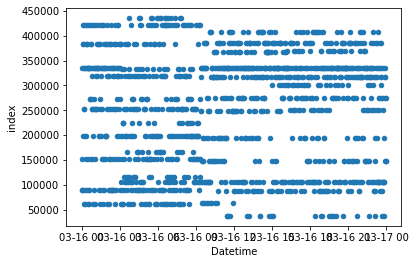

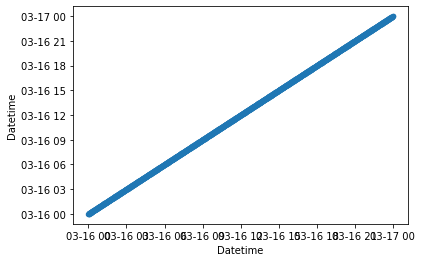

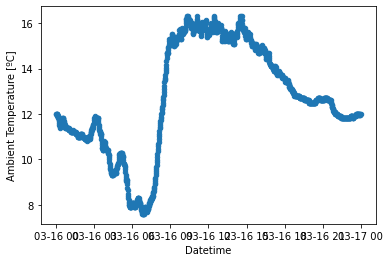

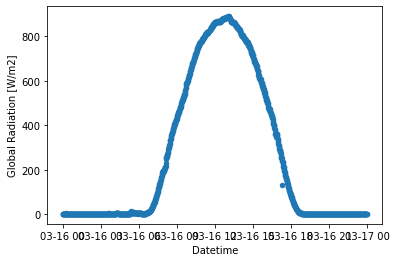

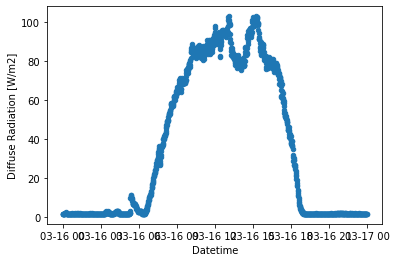

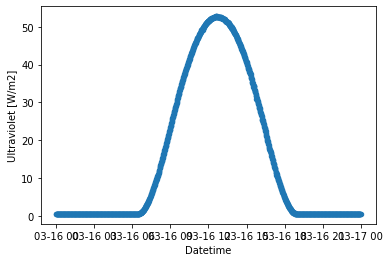

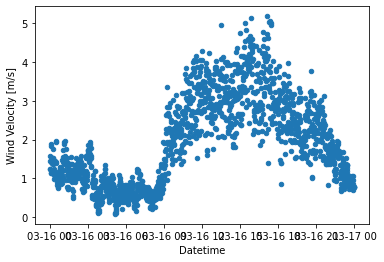

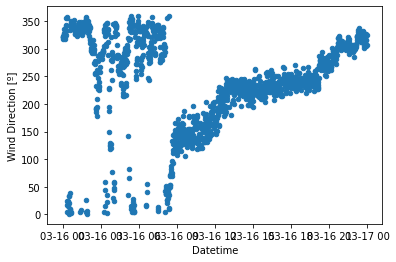

In [52]:
for i in df_d_day.columns:
    df_d_day.plot.scatter(x='Datetime', y = i)

In [53]:
df_d_day.describe()

,index,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,251957.685417,12.729422,262.826393,35.866031,15.282087,1.960151,238.587273
std,113378.141674,2.419860,333.610077,38.127017,19.368432,1.138751,81.276619
min,37174.000000,7.600000,0.952320,1.602942,0.501071,0.083333,0.763049
25%,147947.500000,11.200000,1.592604,1.662290,0.510210,0.933333,206.049485
50%,275207.500000,12.600000,9.021031,8.423341,0.846571,1.833333,241.805530
75%,334484.250000,15.200000,579.015070,78.675580,32.740367,2.833333,302.878280
max,435301.000000,16.300002,890.766080,103.072240,52.761428,5.183334,359.282240


Leaning towards grouping by $\frac{1}{3}$ or $\frac{1}{4}$ days. Will make final decision after next section when looking at correlations. 

Given the day scatter plots, missing values will be replaced with a forward fill; however, an average between rows would be better if I an figure out how to do it. Also, I will eliminate the index column as new indices have been assigned so we have chronological order. 

In [54]:
df_pv_2015.isnull().sum()

Datetime                 0
A_Voltage DC [V]      4854
A_Current DC [A]      4854
A_Power DC [W]        4854
A_Temperature [ºC]       0
B_Voltage DC [V]      3765
B_Current DC [A]      3765
B_Power DC [W]        3765
B_Temperature [ºC]       0
dtype: int64

In [58]:
df_pv_2015.fillna(method='ffill', inplace=True)

In [59]:
#Weather df does not need it. 
df_w_2015.isnull().sum()

Datetime                    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

In [65]:
#Saving dataframes as pickle files on local directory
df_pv_2015.to_pickle('./pv_2015.pkl')
df_w_2015.to_pickle('./w_2015.pkl')